In [11]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

In [12]:
# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# --- Data Collection and Preparation ---
# Updated data with top 20 features
data = {
    'Model': ['DeepSeek-R1 (671B)', 'GPT-4 (1.7T)', 'Llama 3 (70B)', 'Claude 2 (100B)', 'Mistral-7B'],
    'Accuracy': [85.2, 86.5, 84.7, 83.5, 82.9],
    'Speed (Tokens/sec)': [120, 110, 115, 105, 100],
    'Cost per Query ($)': [0.002, 0.015, 0.01, 0.012, 0.008],
    'Parameters (B)': [671, 1700, 70, 100, 7],
    'Energy Consumption (kWh)': [1200, 1500, 1000, 1100, 800],
    'Training Time (Days)': [30, 45, 25, 35, 20],
    'Memory Usage (GB)': [320, 400, 280, 300, 200],
    'Scalability Score': [9, 8, 7, 7, 6],
    'Latency (ms)': [50, 60, 55, 65, 70],
    'API Availability': ['Yes', 'Yes', 'No', 'Yes', 'No'],
    'Fine-Tuning Support': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Multilingual Support': [50, 100, 30, 40, 20],
    'Context Window Size': [2048, 4096, 1024, 2048, 512],
    'Developer Community Size (k)': [200, 500, 100, 150, 50],
    'Ease of Integration (1-10)': [9, 8, 7, 7, 6],
    'Documentation Quality (1-10)': [9, 9, 8, 8, 7],
    'Ethical Compliance': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
    'Open Source': ['No', 'No', 'Yes', 'No', 'Yes'],
    'Error Rate (%)': [2.5, 1.8, 3.0, 2.7, 3.5],
    'User Satisfaction Score (1-10)': [9, 8, 7, 7, 6]
}
df = pd.DataFrame(data)

In [15]:
df

,Model,Accuracy,Speed (Tokens/sec),Cost per Query ($),Parameters (B),Energy Consumption (kWh),Training Time (Days),Memory Usage (GB),Scalability Score,Latency (ms),...,Fine-Tuning Support,Multilingual Support,Context Window Size,Developer Community Size (k),Ease of Integration (1-10),Documentation Quality (1-10),Ethical Compliance,Open Source,Error Rate (%),User Satisfaction Score (1-10)
0,DeepSeek-R1 (671B),85.2,120,0.002,671,1200,30,320,9,50,...,Yes,50,2048,200,9,9,Yes,No,2.5,9
1,GPT-4 (1.7T),86.5,110,0.015,1700,1500,45,400,8,60,...,No,100,4096,500,8,9,Yes,No,1.8,8
2,Llama 3 (70B),84.7,115,0.010,70,1000,25,280,7,55,...,Yes,30,1024,100,7,8,Yes,Yes,3.0,7
3,Claude 2 (100B),83.5,105,0.012,100,1100,35,300,7,65,...,No,40,2048,150,7,8,No,No,2.7,7
4,Mistral-7B,82.9,100,0.008,7,800,20,200,6,70,...,Yes,20,512,50,6,7,Yes,Yes,3.5,6


# --- Exploratory Data Analysis (EDA) ---


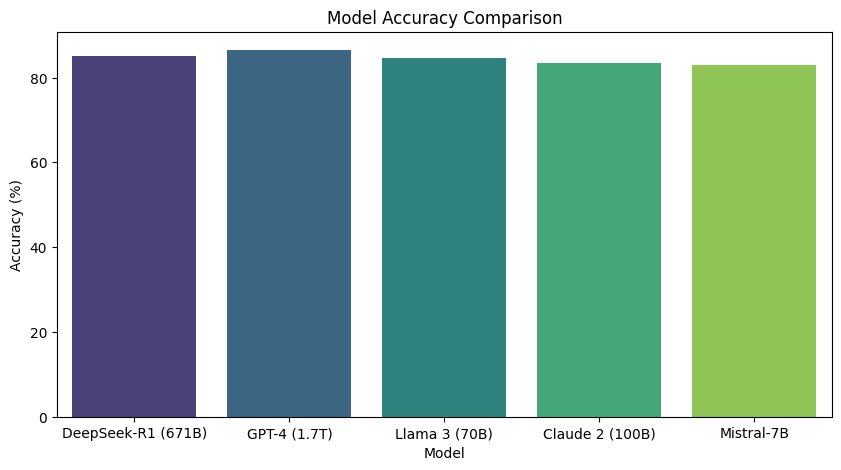

In [16]:
# Visualize accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=df, hue='Model', palette='viridis', dodge=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()

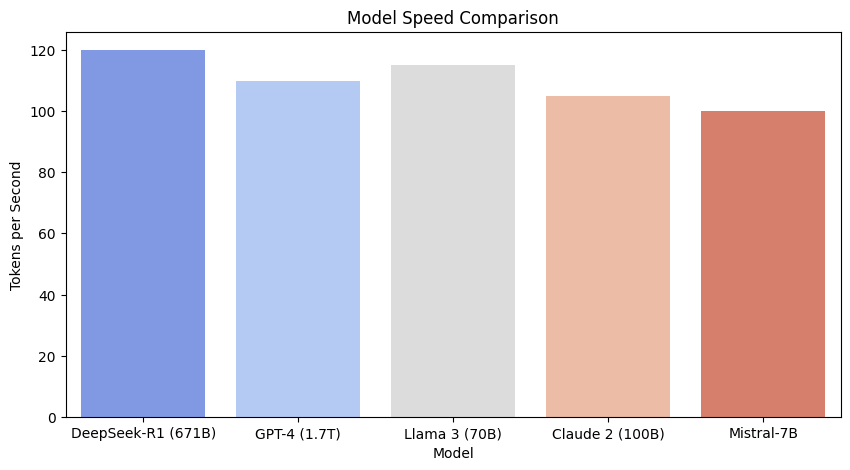

In [17]:
# Visualize speed
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Speed (Tokens/sec)', data=df, hue='Model', palette='coolwarm', dodge=False)
plt.title('Model Speed Comparison')
plt.ylabel('Tokens per Second')
plt.show()

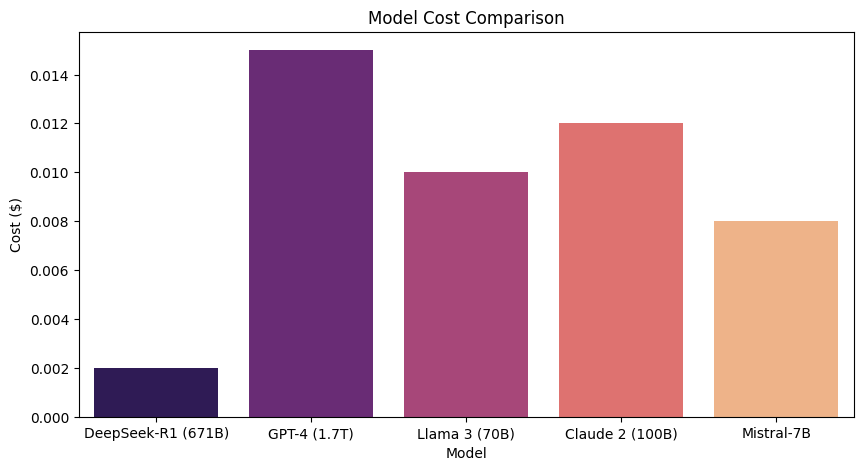

In [18]:
# Visualize cost
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Cost per Query ($)', data=df, hue='Model', palette='magma', dodge=False)
plt.title('Model Cost Comparison')
plt.ylabel('Cost ($)')
plt.show()

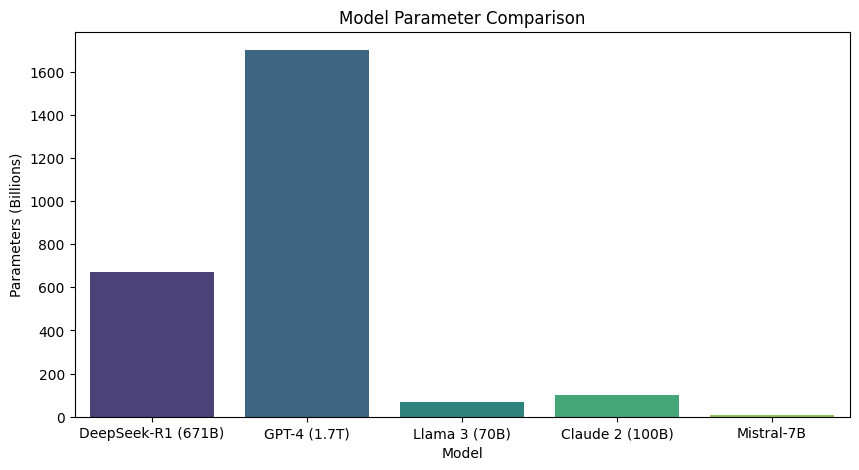

In [19]:
# Visualize parameters
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Parameters (B)', data=df, hue='Model', palette='viridis', dodge=False)
plt.title('Model Parameter Comparison')
plt.ylabel('Parameters (Billions)')
plt.show()

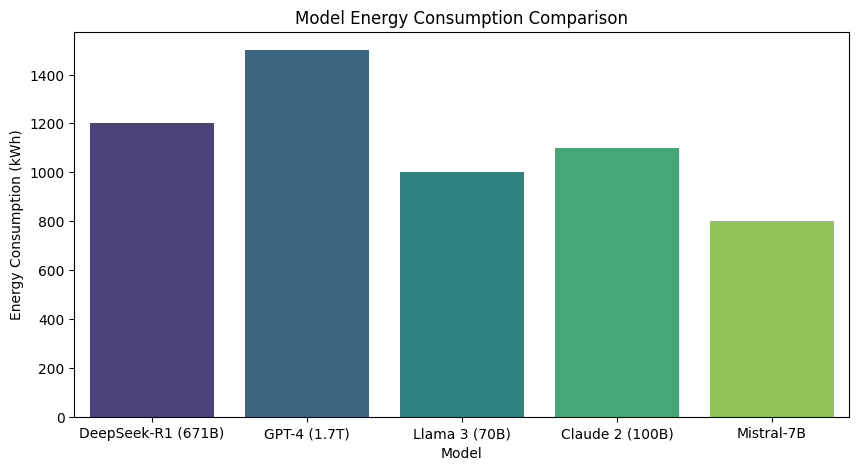

In [20]:
# Visualize energy consumption
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Energy Consumption (kWh)', data=df, hue='Model', palette='viridis', dodge=False)
plt.title('Model Energy Consumption Comparison')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

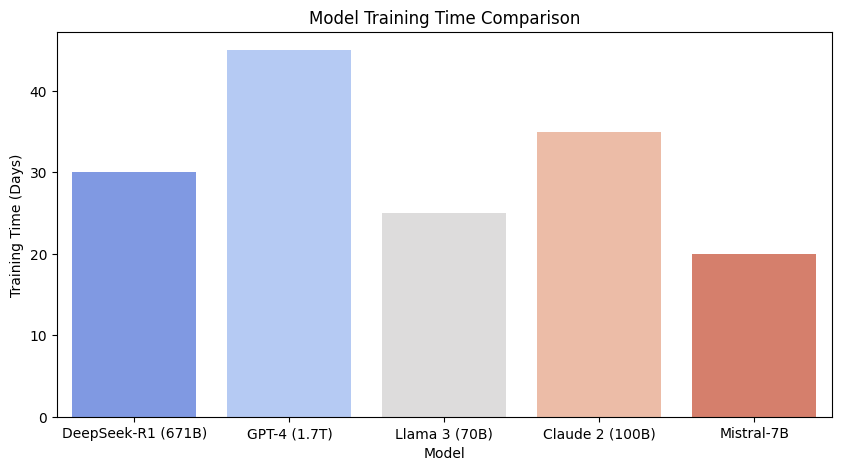

In [21]:
# Visualize training time
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Training Time (Days)', data=df, hue='Model', palette='coolwarm', dodge=False)
plt.title('Model Training Time Comparison')
plt.ylabel('Training Time (Days)')
plt.show()

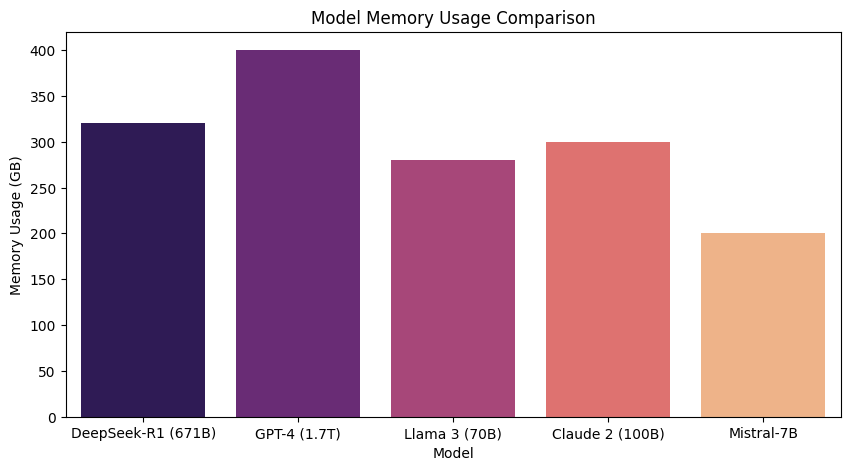

In [22]:
# Visualize memory usage
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Memory Usage (GB)', data=df, hue='Model', palette='magma', dodge=False)
plt.title('Model Memory Usage Comparison')
plt.ylabel('Memory Usage (GB)')
plt.show()

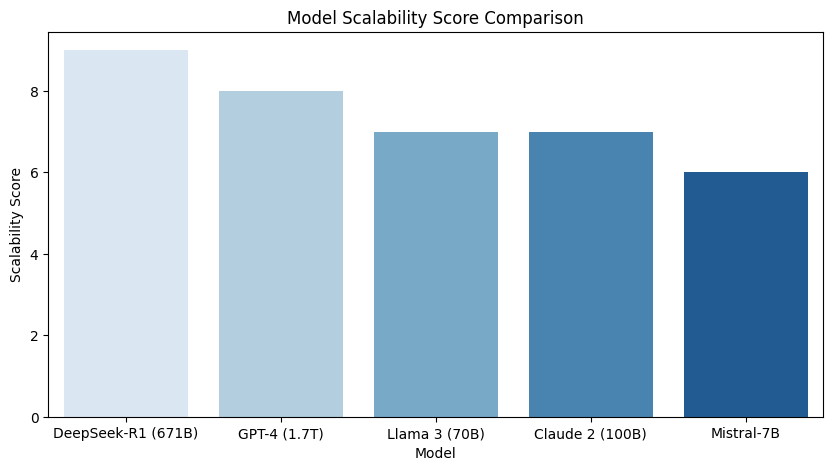

In [23]:
# Visualize scalability score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Scalability Score', data=df, hue='Model', palette='Blues', dodge=False)
plt.title('Model Scalability Score Comparison')
plt.ylabel('Scalability Score')
plt.show()


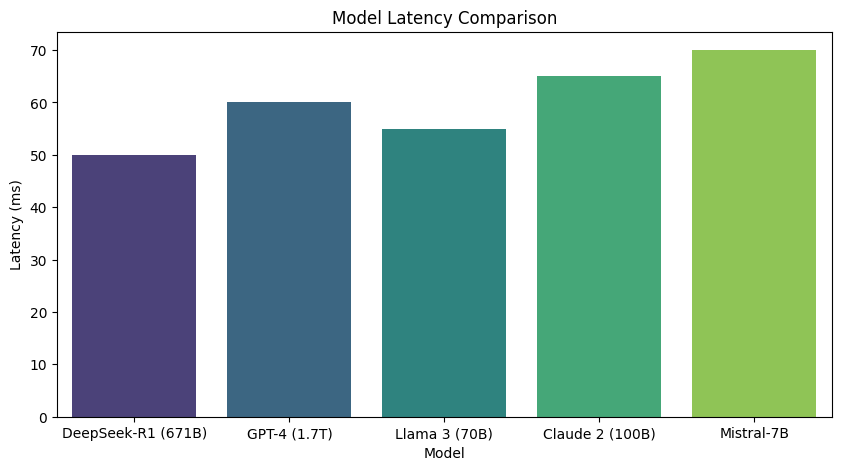

In [24]:
# Visualize latency
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Latency (ms)', data=df, hue='Model', palette='viridis', dodge=False)
plt.title('Model Latency Comparison')
plt.ylabel('Latency (ms)')
plt.show()

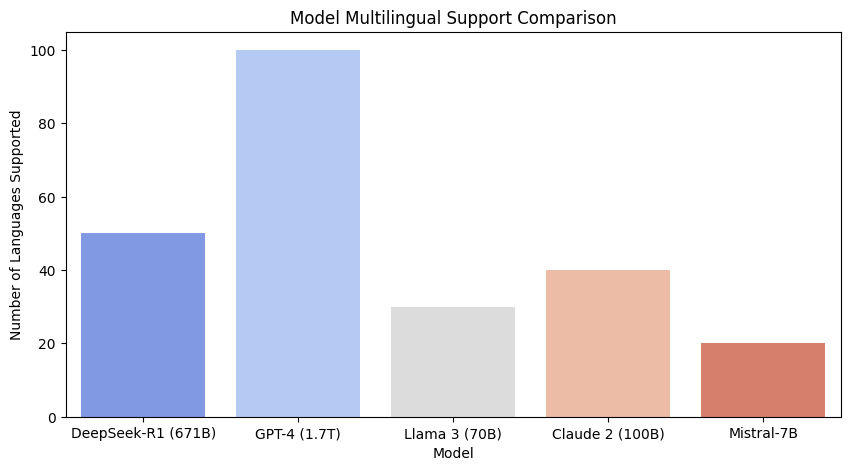

In [25]:

# Visualize multilingual support
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Multilingual Support', data=df, hue='Model', palette='coolwarm', dodge=False)
plt.title('Model Multilingual Support Comparison')
plt.ylabel('Number of Languages Supported')
plt.show()

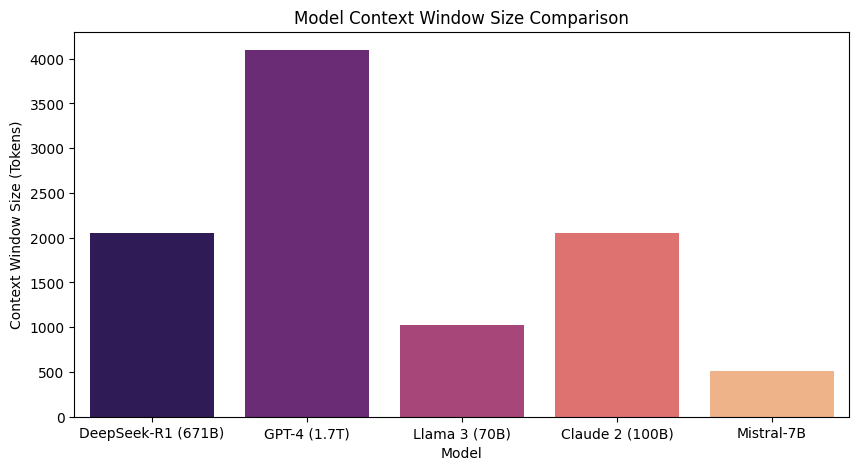

In [26]:
# Visualize context window size
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Context Window Size', data=df, hue='Model', palette='magma', dodge=False)
plt.title('Model Context Window Size Comparison')
plt.ylabel('Context Window Size (Tokens)')
plt.show()

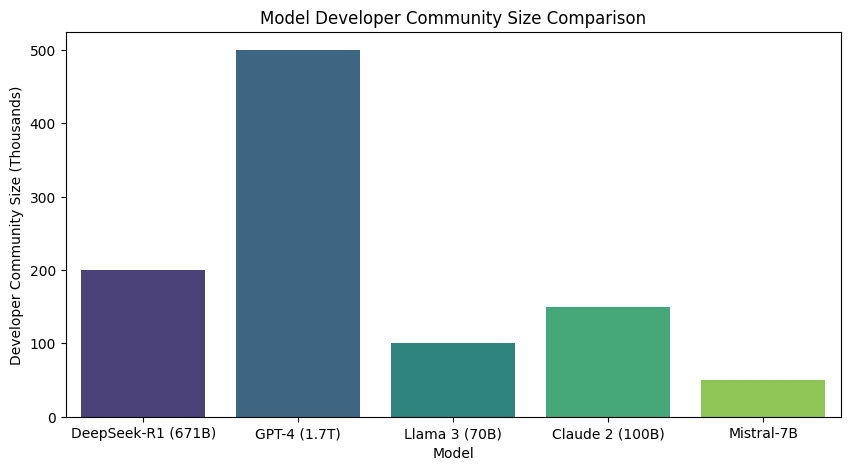

In [27]:
# Visualize developer community size
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Developer Community Size (k)', data=df, hue='Model', palette='viridis', dodge=False)
plt.title('Model Developer Community Size Comparison')
plt.ylabel('Developer Community Size (Thousands)')
plt.show()

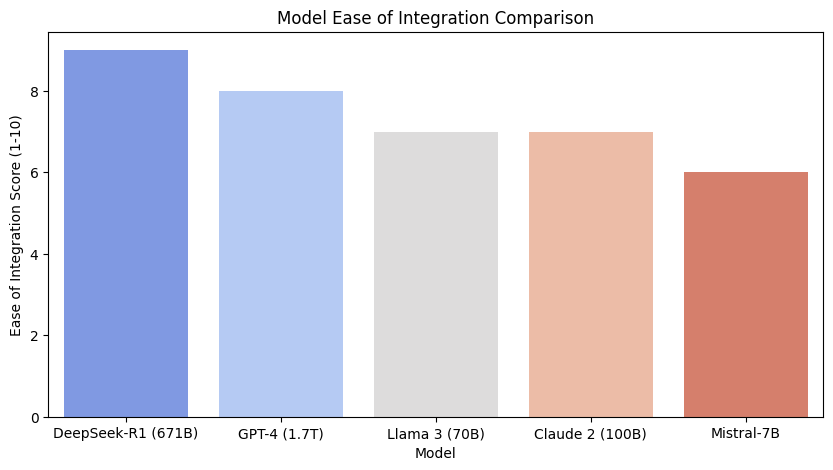

In [28]:

# Visualize ease of integration
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Ease of Integration (1-10)', data=df, hue='Model', palette='coolwarm', dodge=False)
plt.title('Model Ease of Integration Comparison')
plt.ylabel('Ease of Integration Score (1-10)')
plt.show()


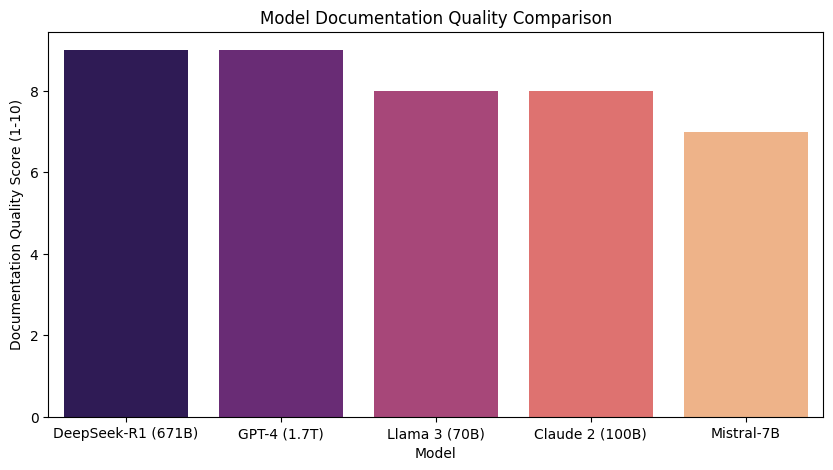

In [29]:
# Visualize documentation quality
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Documentation Quality (1-10)', data=df, hue='Model', palette='magma', dodge=False)
plt.title('Model Documentation Quality Comparison')
plt.ylabel('Documentation Quality Score (1-10)')
plt.show()

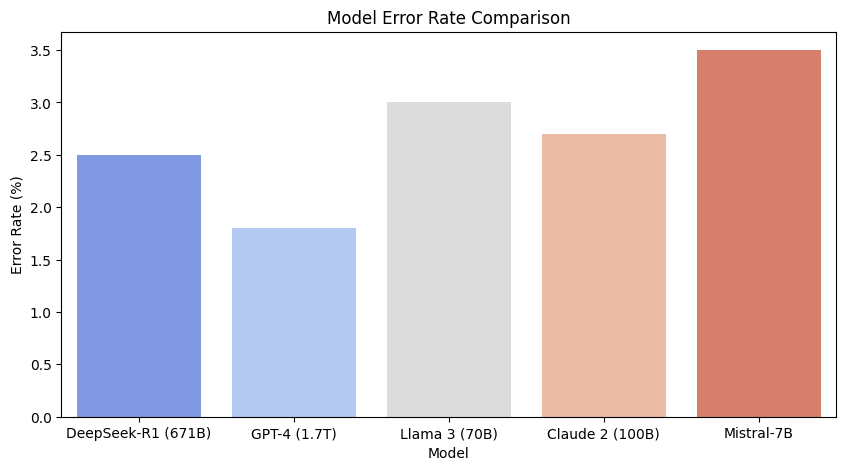

In [30]:
# Visualize error rate
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Error Rate (%)', data=df, hue='Model', palette='coolwarm', dodge=False)
plt.title('Model Error Rate Comparison')
plt.ylabel('Error Rate (%)')
plt.show()

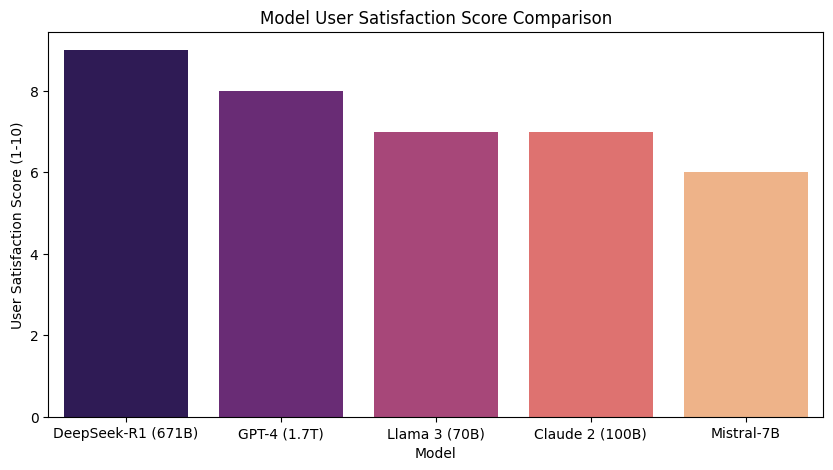

In [31]:
# Visualize user satisfaction score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='User Satisfaction Score (1-10)', data=df, hue='Model', palette='magma', dodge=False)
plt.title('Model User Satisfaction Score Comparison')
plt.ylabel('User Satisfaction Score (1-10)')
plt.show()

In [32]:
# Sample user reviews
reviews = {
    'DeepSeek-R1 (671B)': ["DeepSeek-R1 is amazing and cost-effective!", "It's very powerful for complex tasks."],
    'GPT-4 (1.7T)': ["GPT-4 is great but quite expensive.", "It's the most advanced model but has limitations."],
    'Llama 3 (70B)': ["Llama 3 is good but slower than DeepSeek.", "It's a decent alternative for general use cases."],
    'Claude 2 (100B)': ["Claude 2 lacks efficiency in large-scale tasks.", "It struggles with complex reasoning."],
    'Mistral-7B': ["Mistral-7B is a budget-friendly alternative.", "It's suitable for simpler tasks."]
}


In [33]:
reviews

{'DeepSeek-R1 (671B)': ['DeepSeek-R1 is amazing and cost-effective!',
  "It's very powerful for complex tasks."],
 'GPT-4 (1.7T)': ['GPT-4 is great but quite expensive.',
  "It's the most advanced model but has limitations."],
 'Llama 3 (70B)': ['Llama 3 is good but slower than DeepSeek.',
  "It's a decent alternative for general use cases."],
 'Claude 2 (100B)': ['Claude 2 lacks efficiency in large-scale tasks.',
  'It struggles with complex reasoning.'],
 'Mistral-7B': ['Mistral-7B is a budget-friendly alternative.',
  "It's suitable for simpler tasks."]}

In [34]:
# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
sentiments = {}
for model, model_reviews in reviews.items():
    sentiments[model] = [sia.polarity_scores(review)['compound'] for review in model_reviews]

In [35]:
sentiments

{'DeepSeek-R1 (671B)': [0.6239, 0.4754],
 'GPT-4 (1.7T)': [0.3716, 0.1646],
 'Llama 3 (70B)': [0.2382, 0.0],
 'Claude 2 (100B)': [0.3612, -0.3612],
 'Mistral-7B': [0.0, 0.0]}

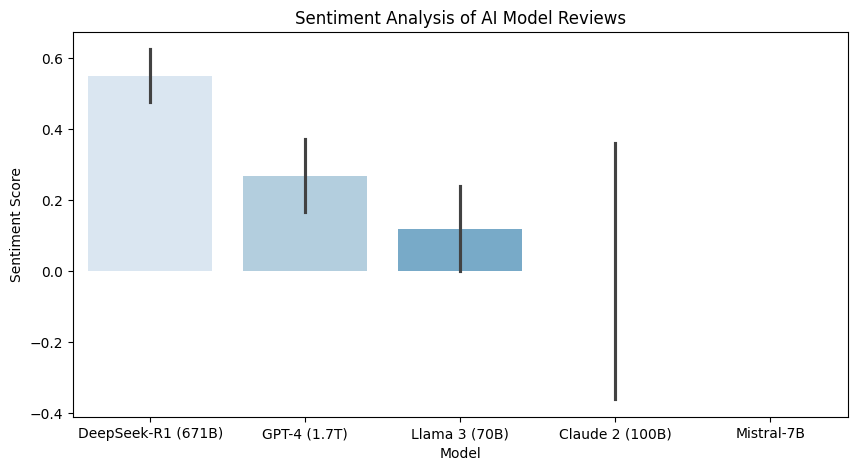

In [36]:

# Visualize sentiment scores
sentiment_data = []
for model, scores in sentiments.items():
    for score in scores:
        sentiment_data.append([model, score])

sentiment_df = pd.DataFrame(sentiment_data, columns=['Model', 'Sentiment Score'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Sentiment Score', data=sentiment_df, hue='Model', palette='Blues', dodge=False)
plt.title('Sentiment Analysis of AI Model Reviews')
plt.ylabel('Sentiment Score')
plt.show()

In [37]:
sentiment_data

[['DeepSeek-R1 (671B)', 0.6239],
 ['DeepSeek-R1 (671B)', 0.4754],
 ['GPT-4 (1.7T)', 0.3716],
 ['GPT-4 (1.7T)', 0.1646],
 ['Llama 3 (70B)', 0.2382],
 ['Llama 3 (70B)', 0.0],
 ['Claude 2 (100B)', 0.3612],
 ['Claude 2 (100B)', -0.3612],
 ['Mistral-7B', 0.0],
 ['Mistral-7B', 0.0]]

In [38]:
# Advanced sentiment analysis using transformers
sentiment_pipeline = pipeline("sentiment-analysis")
for model, model_reviews in reviews.items():
    print(f"\nSentiment Analysis for {model}:")
    for review in model_reviews:
        result = sentiment_pipeline(review)
        print(f"Review: {review} \nSentiment: {result[0]['label']} with confidence {result[0]['score']:.2f}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



Sentiment Analysis for DeepSeek-R1 (671B):
Review: DeepSeek-R1 is amazing and cost-effective! 
Sentiment: POSITIVE with confidence 1.00
Review: It's very powerful for complex tasks. 
Sentiment: POSITIVE with confidence 1.00

Sentiment Analysis for GPT-4 (1.7T):
Review: GPT-4 is great but quite expensive. 
Sentiment: POSITIVE with confidence 0.99
Review: It's the most advanced model but has limitations. 
Sentiment: NEGATIVE with confidence 0.99

Sentiment Analysis for Llama 3 (70B):
Review: Llama 3 is good but slower than DeepSeek. 
Sentiment: POSITIVE with confidence 0.99
Review: It's a decent alternative for general use cases. 
Sentiment: POSITIVE with confidence 1.00

Sentiment Analysis for Claude 2 (100B):
Review: Claude 2 lacks efficiency in large-scale tasks. 
Sentiment: NEGATIVE with confidence 1.00
Review: It struggles with complex reasoning. 
Sentiment: NEGATIVE with confidence 1.00

Sentiment Analysis for Mistral-7B:
Review: Mistral-7B is a budget-friendly alternative. 
Senti

In [39]:

# --- Cost-Benefit Analysis ---
# Calculate cost efficiency (Accuracy / Cost)
df['Efficiency Score'] = df['Accuracy'] / df['Cost per Query ($)']
print("\nCost Efficiency Scores:")
print(df[['Model', 'Efficiency Score']])

# Analyze cost-efficiency in relation to parameters
df['Cost per Billion Parameters'] = df['Cost per Query ($)'] / df['Parameters (B)']
print("\nCost Efficiency per Billion Parameters:")
print(df[['Model', 'Cost per Billion Parameters']])

# Calculate energy efficiency (Accuracy / Energy Consumption)
df['Energy Efficiency'] = df['Accuracy'] / df['Energy Consumption (kWh)']
print("\nEnergy Efficiency Scores:")
print(df[['Model', 'Energy Efficiency']])


Cost Efficiency Scores:
                Model  Efficiency Score
0  DeepSeek-R1 (671B)      42600.000000
1        GPT-4 (1.7T)       5766.666667
2       Llama 3 (70B)       8470.000000
3     Claude 2 (100B)       6958.333333
4          Mistral-7B      10362.500000

Cost Efficiency per Billion Parameters:
                Model  Cost per Billion Parameters
0  DeepSeek-R1 (671B)                     0.000003
1        GPT-4 (1.7T)                     0.000009
2       Llama 3 (70B)                     0.000143
3     Claude 2 (100B)                     0.000120
4          Mistral-7B                     0.001143

Energy Efficiency Scores:
                Model  Energy Efficiency
0  DeepSeek-R1 (671B)           0.071000
1        GPT-4 (1.7T)           0.057667
2       Llama 3 (70B)           0.084700
3     Claude 2 (100B)           0.075909
4          Mistral-7B           0.103625


# --- Advanced Analysis ---


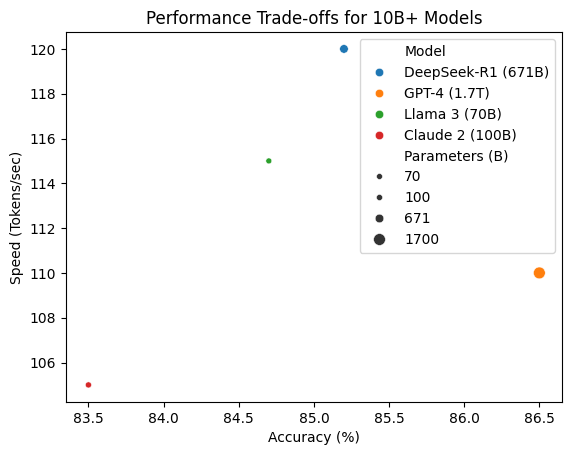

In [40]:
# Analyze performance trade-offs for 10B+ models
large_models = df[df['Parameters (B)'] >= 10]  # Filter for 10B+ models
sns.scatterplot(x='Accuracy', y='Speed (Tokens/sec)', data=large_models, hue='Model', size='Parameters (B)')
plt.title('Performance Trade-offs for 10B+ Models')
plt.xlabel('Accuracy (%)')
plt.ylabel('Speed (Tokens/sec)')
plt.show()

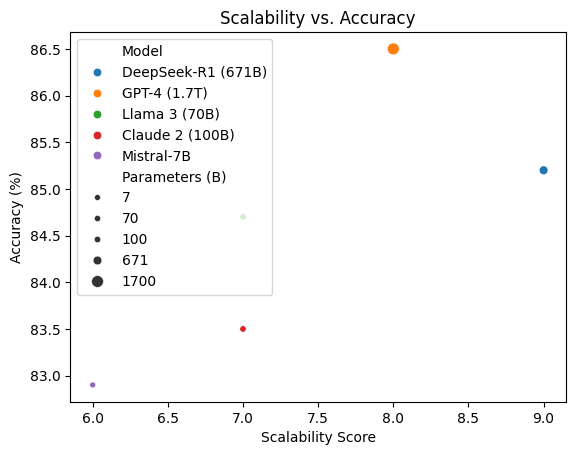

In [41]:
# Analyze scalability vs. accuracy
sns.scatterplot(x='Scalability Score', y='Accuracy', data=df, hue='Model', size='Parameters (B)')
plt.title('Scalability vs. Accuracy')
plt.xlabel('Scalability Score')
plt.ylabel('Accuracy (%)')
plt.show()

In [42]:

# --- Potential Use Cases ---
print("\nPotential Use Cases for DeepSeek:")
print("- High-accuracy tasks requiring cost-efficiency.")
print("- Applications with moderate speed requirements but high scalability needs.")
print("- Energy-conscious environments where energy efficiency is critical.")
print("- Scenarios requiring a balance between training time and model performance.")



Potential Use Cases for DeepSeek:
- High-accuracy tasks requiring cost-efficiency.
- Applications with moderate speed requirements but high scalability needs.
- Energy-conscious environments where energy efficiency is critical.
- Scenarios requiring a balance between training time and model performance.


In [43]:
# --- Conclusion and Insights ---
print("\nConclusion and Insights:")
print("- DeepSeek-R1 (671B) offers a strong balance between accuracy, cost-efficiency, and energy efficiency.")
print("- GPT-4 (1.7T) leads in accuracy but at a higher cost and energy consumption.")
print("- Llama 3 (70B) and Claude 2 (100B) are good alternatives but lag in cost-efficiency and scalability.")
print("- Mistral-7B is the most cost-effective for simpler tasks but lacks in accuracy and scalability.")
print("- DeepSeek-R1 (671B) is particularly well-suited for applications requiring a balance of performance, cost, and energy efficiency.")


Conclusion and Insights:
- DeepSeek-R1 (671B) offers a strong balance between accuracy, cost-efficiency, and energy efficiency.
- GPT-4 (1.7T) leads in accuracy but at a higher cost and energy consumption.
- Llama 3 (70B) and Claude 2 (100B) are good alternatives but lag in cost-efficiency and scalability.
- Mistral-7B is the most cost-effective for simpler tasks but lacks in accuracy and scalability.
- DeepSeek-R1 (671B) is particularly well-suited for applications requiring a balance of performance, cost, and energy efficiency.
